<a href="https://colab.research.google.com/github/Loick54/PUC/blob/main/JAEGER_LOICK_Test2_ChristianMata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a

---

la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


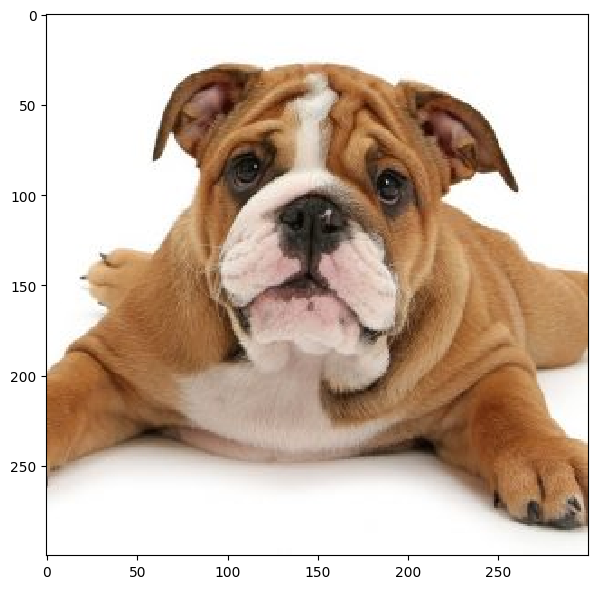

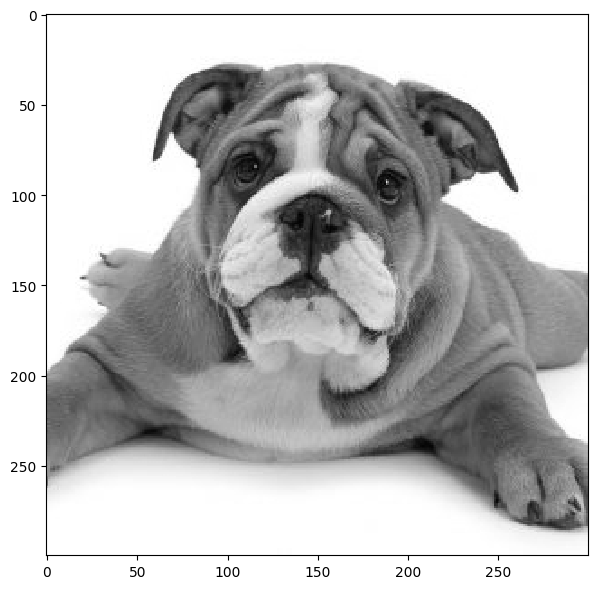

In [4]:
import skimage as sk
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from google.colab import drive


drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/UL/dog_image.jpg'
I1 = sk.io.imread(file_path)
I1.shape #3 = couleur
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I1) # visualize image using imshow function
sk.io.show()

#conversión a escala de grises

IG = sk.color.rgb2gray(I1)
IG.shape
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG) # visualize image using imshow function
sk.io.show()


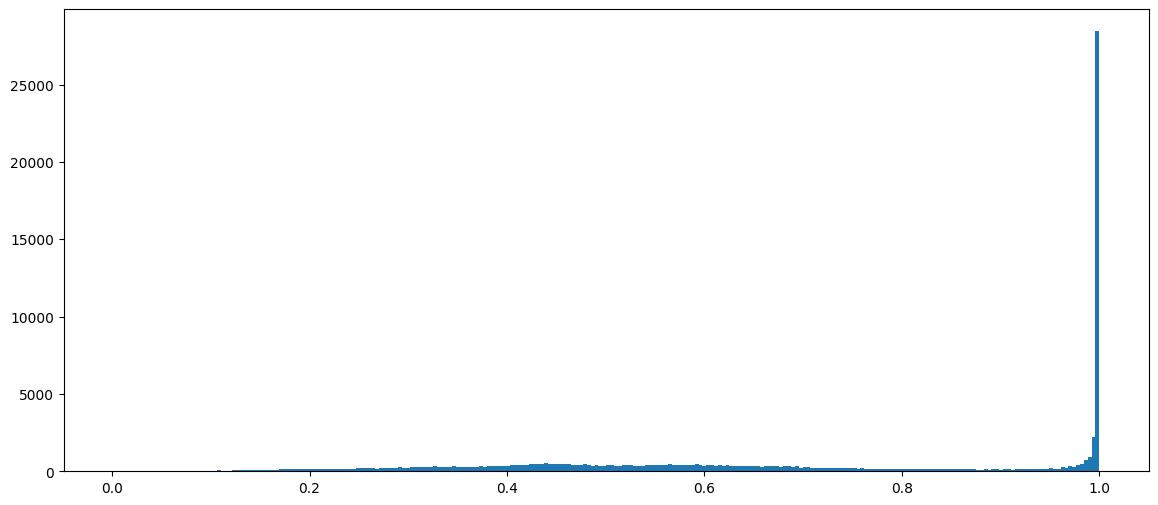

In [8]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1) #un histogramme ça se fait uavec un vecteur et pas une matrice
#la fonction reshape permet de transformer la matrice en un vecteur en alignant chaque ligne

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False) #il faut un grand bins sinn tout est trop dense et on voit rien mais pas nn plus trop grand. La density n'affecte pas sur cet histogramme.
#False se concentre sur l'image originale pas sur un éventuel filtre.
plt.show()

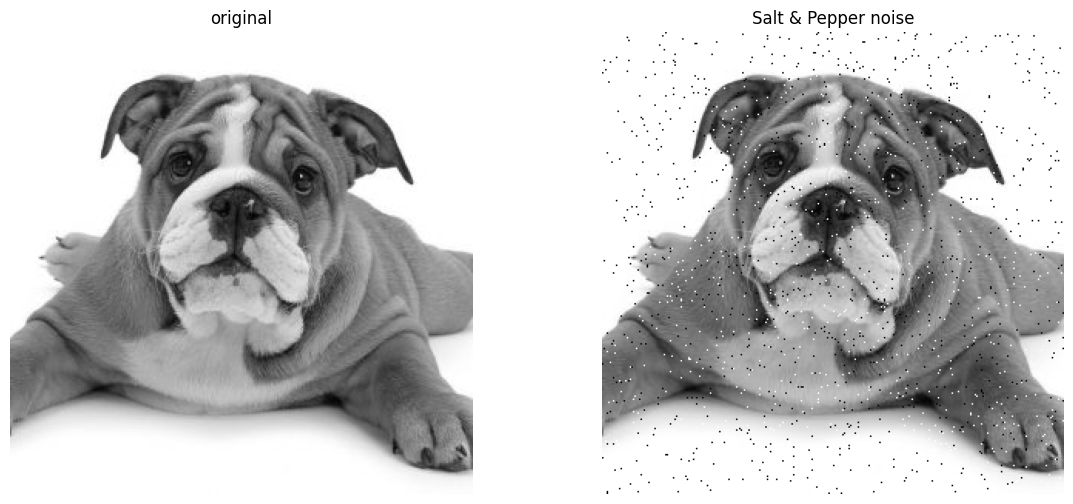

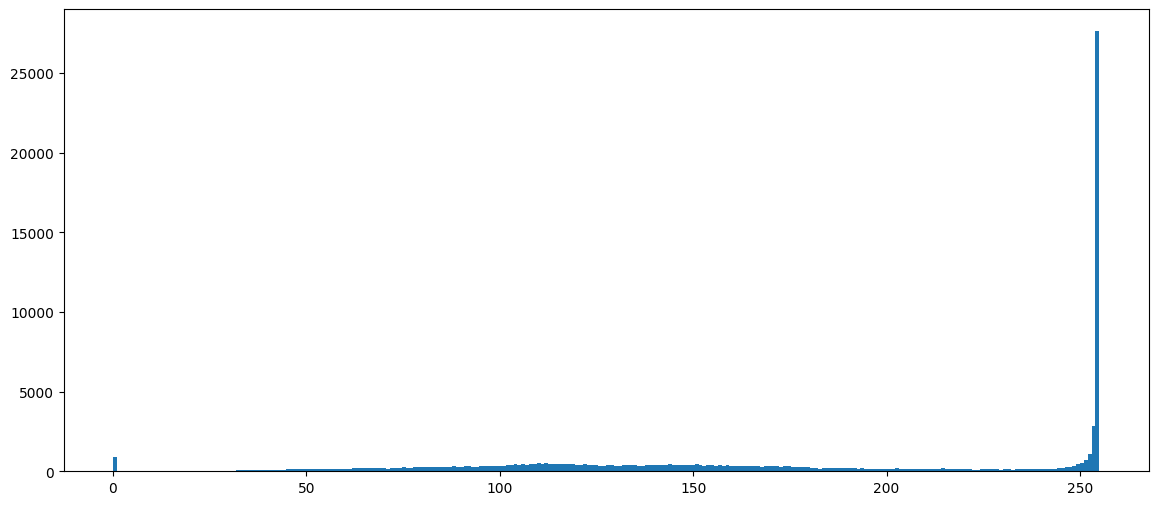

In [14]:
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0 # pour créer le bruit à partir de fonction manuelle (on ajoute des poins noirs et blancs)
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')



# reshape the uint8 image as 1d array:
v1 = noisy_image.reshape(noisy_image.shape[0]*noisy_image.shape[1],1) #un histogramme ça se fait uavec un vecteur et pas une matrice
fig = plt.figure(figsize=(14, 6))
plt.hist(v1, bins=256,density=False) #il faut un grand bins sinn tout est trop dense et on voit rien mais pas nn plus trop grand. La density n'affecte pas sur cet histogramme.
#False se concentre sur l'image originale pas sur un éventuel filtre.
plt.show()



Hay mas pixeles blancos en el histograma de la imagen con ruido. Es normal porque es un ruido sal and pepper.

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

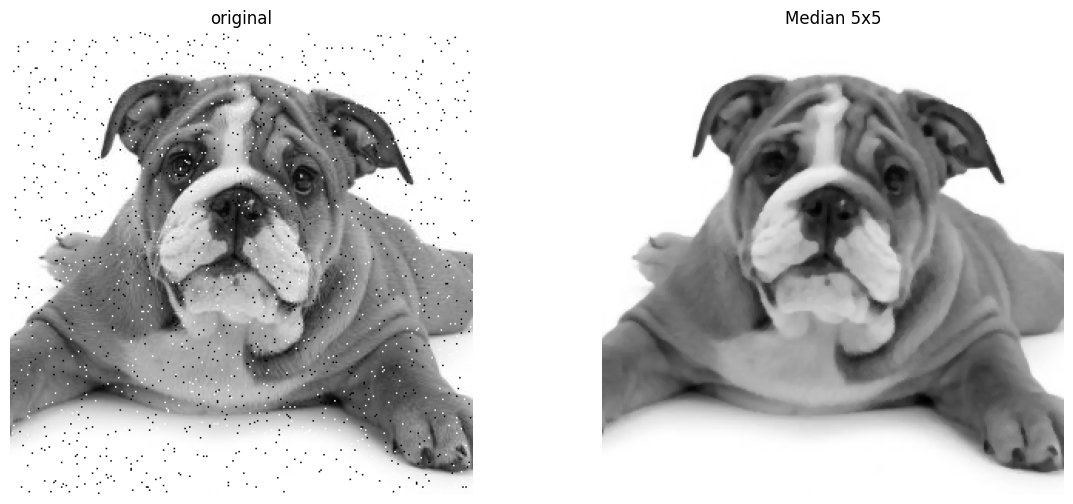

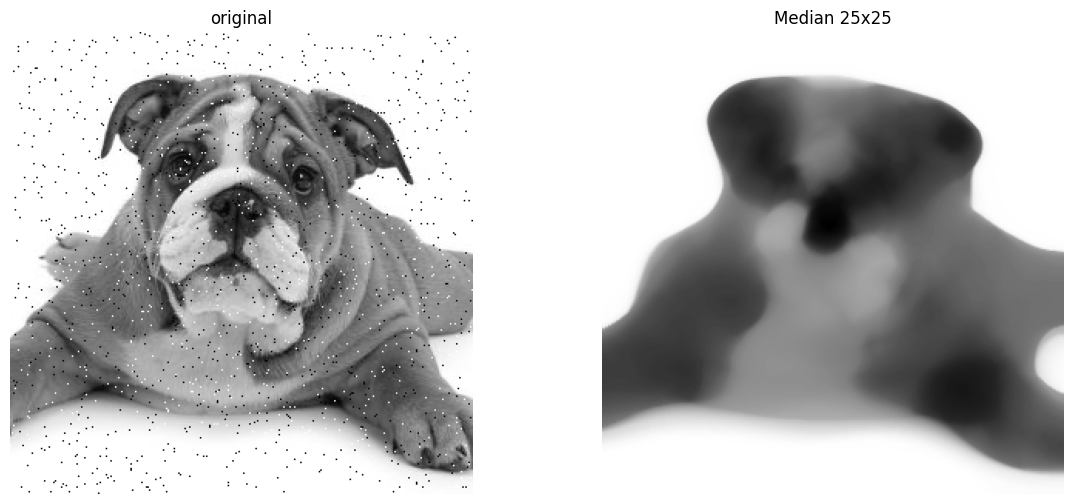

In [12]:
#Median filter: functionna bien aunque es un poco borroso

from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image) #fonction gaussienne (mdian filter pour peu de bruit) qui localise les maximums et les corrigent
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img,img_med25x25,'Median 25x25')

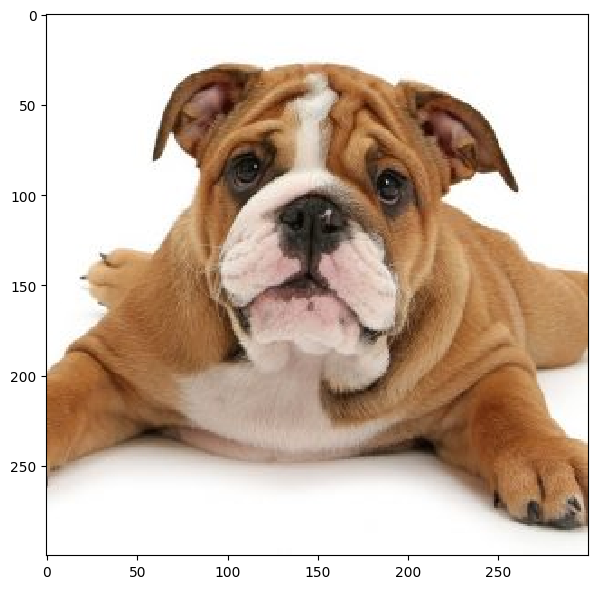

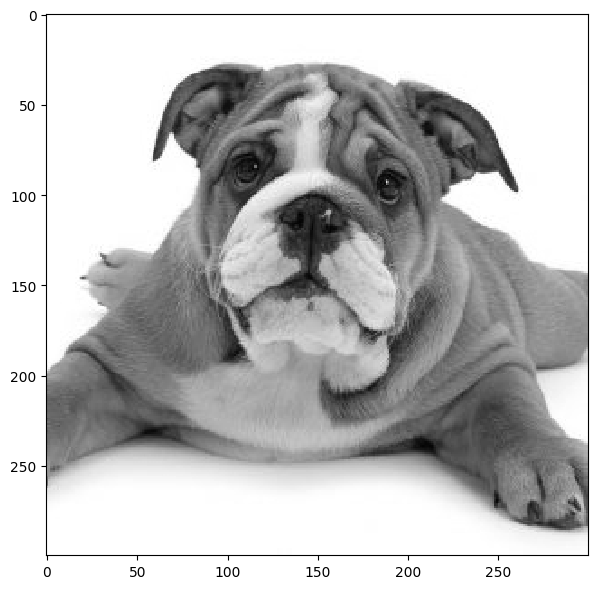

In [18]:
file_path = '/content/drive/MyDrive/UL/dog_image.jpg'
I2 = sk.io.imread(file_path)
I2.shape #3 = couleur
fig = plt.figure(figsize=(10,6))
sk.io.imshow(I2) # visualize image using imshow function
sk.io.show()

#conversión a escala de grises

IG2 = sk.color.rgb2gray(I2)
IG2.shape
fig = plt.figure(figsize=(10,6))
sk.io.imshow(IG2) # visualize image using imshow function
sk.io.show()

3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

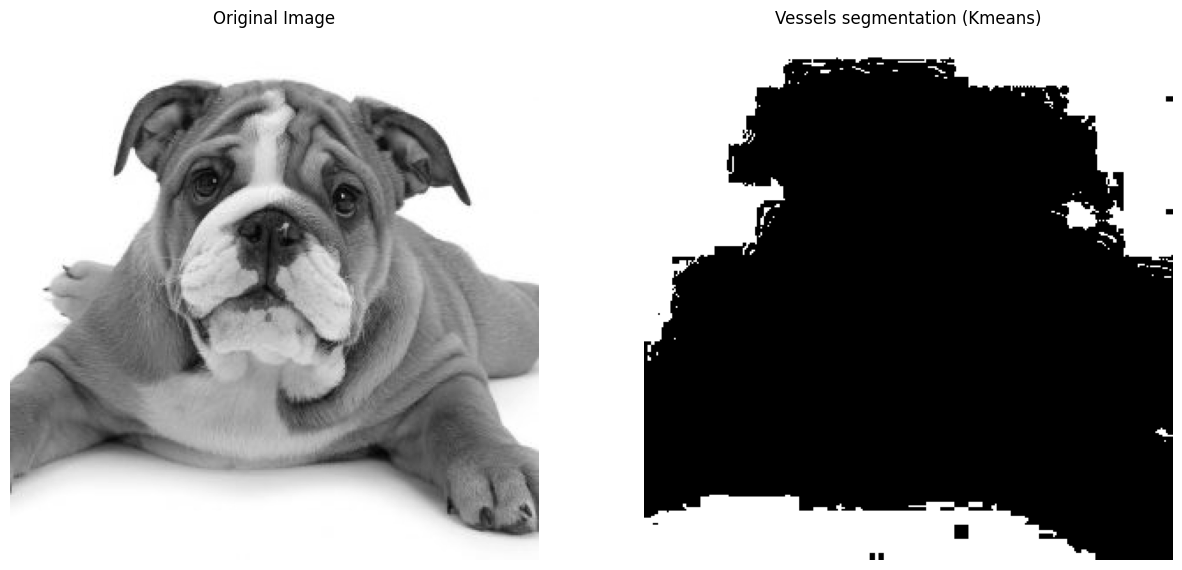

In [19]:
from sklearn.cluster import KMeans
import numpy as np

# reshape training image as 1d array:
v_I_train = IG2.reshape(IG2.shape[0]*IG2.shape[1],1).astype(np.uint8)

# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_train)

# Apply to predict test image:
v_I_test = IG2.reshape(IG2.shape[0]*IG2.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(IG2.shape[0],IG2.shape[1]).astype(np.uint8) # Shape back result as image

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(IG2, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Vessels segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?

Es util para distinguir los diferentes materiales como lo vimos coon la entropia y la textura. Por ejemplo, se puede imaginar facilitar el recyclaje con estas tecnicas. Podriamos clasificar residuos mas facilmente y asi recyclar los de manera mas facil.